In [1]:
from __future__ import print_function, absolute_import

import os
import sys
import argparse

import numpy as np
import matplotlib.pyplot as plt

In [2]:
sys.path.insert(0,'../')
import crisp
import crisp.rotations
from crisp.imu_new import post_process_L3G4200D_data
from crisp.calibration import PARAM_ORDER

In [3]:
CAMERA_MATRIX = np.array(
    [[ 853.12703455,    0.        ,  988.06311256],
     [   0.        ,  873.54956631,  525.71056312],
     [   0.        ,    0.        ,    1.        ]]
)
CAMERA_DIST_CENTER = (0.00291108,  0.00041897)
CAMERA_DIST_PARAM = 0.8894355
CAMERA_FRAME_RATE = 30.0
CAMERA_IMAGE_SIZE = (1920, 1080)
CAMERA_READOUT = 0.0316734
GYRO_RATE_GUESS = 853.86

In [4]:
def to_rot_matrix(r):
    "Convert combined axis angle vector to rotation matrix"
    theta = np.linalg.norm(r)
    v = r/theta
    R = crisp.rotations.axis_angle_to_rotation_matrix(v, theta)
    return R

## provide video file, gyro file, and reference file

In [5]:
basepath = 'D:\dtu\data\gopro-gyro-dataset\gopro-gyro-dataset'
video = basepath + '\walk' + '.MP4'
gyro_file = os.path.splitext(video)[0] + '_gyro.csv'
reference_file = os.path.splitext(video)[0] + '_reference.csv'
print('video file:%s \ngyro file: %s\nreference_file:%s\n'%(video,gyro_file,reference_file))

video file:D:\dtu\data\gopro-gyro-dataset\gopro-gyro-dataset\walk.MP4 
gyro file: D:\dtu\data\gopro-gyro-dataset\gopro-gyro-dataset\walk_gyro.csv
reference_file:D:\dtu\data\gopro-gyro-dataset\gopro-gyro-dataset\walk_reference.csv



In [6]:
# obtain from a pre-calibration for the rolling shutter camera
camera = crisp.AtanCameraModel(CAMERA_IMAGE_SIZE, 
                               CAMERA_FRAME_RATE, 
                               CAMERA_READOUT, 
                               CAMERA_MATRIX,
                               CAMERA_DIST_CENTER, CAMERA_DIST_PARAM)

In [7]:
print('Creating video stream from {}'.format(video))
video = crisp.VideoStream.from_file(camera, video)
#video.display_video()


Creating video stream from D:\dtu\data\gopro-gyro-dataset\gopro-gyro-dataset\walk.MP4


In [8]:
print('Creating gyro stream from {}'.format(gyro_file))
gyro = crisp.GyroStream.from_csv(gyro_file)

Creating gyro stream from D:\dtu\data\gopro-gyro-dataset\gopro-gyro-dataset\walk_gyro.csv


Post processing L3G4200D gyroscope data to remove frequency spike noise


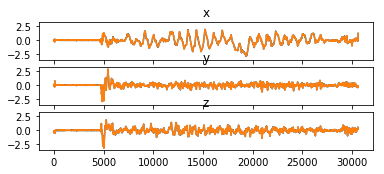

In [9]:
print('Post processing L3G4200D gyroscope data to remove frequency spike noise')
gyro.data = post_process_L3G4200D_data(gyro.data.T, do_plot=True).T

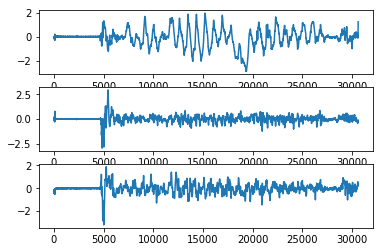

In [10]:
figs,axs = plt.subplots(3,1)
axs[0].plot(gyro.data[:,0])
axs[1].plot(gyro.data[:,1])
axs[2].plot(gyro.data[:,2])

In [11]:
import importlib
importlib.reload(crisp)

<module 'crisp' from '..\\crisp\\__init__.py'>

In [12]:
print('Creating calibrator')
calibrator = crisp.AutoCalibrator(video, gyro)

Creating calibrator


In [13]:
print('Estimating time offset and camera to gyroscope rotation. Guessing gyro rate = {:.2f}'.format(GYRO_RATE_GUESS))
try:
    calibrator.initialize(gyro_rate=GYRO_RATE_GUESS)
except crisp.InitializationError as e:
    print('Initialization failed. Reason "{}"'.format(e.message))
    sys.exit(-1)

Estimating time offset and camera to gyroscope rotation. Guessing gyro rate = 853.86
[[ 0.64020007  0.61087926 -0.63101483 ... -0.37942226 -0.59928227
   0.36391764]
 [-0.03996982 -0.01467506 -0.58176768 ... -0.28283344 -0.60309463
   0.14778985]
 [ 1.          1.          1.         ...  1.          1.
   1.        ]]
[[ 0.64008094  0.61076087 -0.63096069 ... -0.37944783 -0.5992213
   0.3637974 ]
 [-0.03967833 -0.01439117 -0.58171394 ... -0.28274734 -0.60302995
   0.14802175]
 [ 1.          1.          1.         ...  1.          1.
   1.        ]]
[[ 0.64022111  0.61090048 -0.63098222 ... -0.37940175 -0.5992506
   0.36393829]
 [-0.03993627 -0.01464114 -0.58170853 ... -0.28278939 -0.6030348
   0.14782689]
 [ 1.          1.          1.         ...  1.          1.
   1.        ]]
[[ 0.64019428  0.61087387 -0.63101039 ... -0.37942337 -0.59927772
   0.36391389]
 [-0.03994645 -0.01465189 -0.58174339 ... -0.28281265 -0.60306968
   0.14781233]
 [ 1.          1.          1.         ...  1.   

[[-5.41448767e-01 -3.80077372e-01 -4.51810004e-01 -3.91390743e-01
  -3.58085534e-01 -5.57546330e-01 -4.12820580e-01 -3.79936734e-01
  -5.16534956e-01 -4.10624467e-01 -3.39048046e-01 -3.87379863e-01
   7.35467778e-01  6.79267490e-01 -4.45771199e-01 -3.01257696e-01
  -4.22388021e-01 -5.73709477e-01 -3.03596194e-01 -5.60946716e-01
  -7.34840967e-01 -3.46366722e-01 -4.20672185e-01 -5.95716411e-01
  -7.98777936e-01 -4.92440930e-01 -6.34528152e-01 -6.04319826e-01
  -6.96664249e-01 -3.35150420e-01 -5.76073587e-01 -7.92484680e-01
  -6.98225754e-01 -3.23377140e-01 -3.39778971e-01 -6.31962610e-01
  -5.66845505e-01 -5.67685005e-01 -6.21498746e-01 -4.68848244e-01
  -5.55879899e-01 -6.43064284e-01 -4.12019538e-01 -3.31105600e-01
  -2.77296544e-01 -4.46415105e-01 -5.42510896e-01  5.52687487e-01
  -4.86814248e-01 -2.38375256e-01  2.46347797e-01 -7.20735665e-01
  -6.39261022e-01 -2.63316795e-01 -2.92737413e-01 -4.33675191e-01
  -4.79338519e-01 -6.51770677e-01 -4.84119464e-01 -7.28087005e-01
  -6.04795

[[-5.34901939e-01 -3.74252858e-01 -4.45716979e-01 -3.85565292e-01
  -3.52396428e-01 -5.50904868e-01 -4.06902978e-01 -3.74159660e-01
  -5.10118620e-01 -4.04711487e-01 -3.33432162e-01 -3.81575122e-01
   7.43094736e-01  6.86537943e-01 -4.39702540e-01 -2.95776232e-01
  -4.16440295e-01 -5.66976691e-01 -2.98113998e-01 -5.54290834e-01
  -7.26886643e-01 -3.40718660e-01 -4.14718566e-01 -5.88844926e-01
  -7.90349532e-01 -4.86149797e-01 -6.27363351e-01 -5.97357674e-01
  -6.89079731e-01 -3.29556784e-01 -5.69325599e-01 -7.84135403e-01
  -6.90617407e-01 -3.17812532e-01 -3.34185404e-01 -6.24837752e-01
  -5.60145276e-01 -5.60984102e-01 -6.14419873e-01 -4.62673894e-01
  -5.49246497e-01 -6.35850023e-01 -4.06117447e-01 -3.25546523e-01
  -2.71874115e-01 -4.40356466e-01 -5.35956270e-01  5.59128942e-01
  -4.80551286e-01 -2.33059317e-01  2.51802829e-01 -7.12934174e-01
  -6.32067431e-01 -2.57876123e-01 -2.87258469e-01 -4.27669373e-01
  -4.73114022e-01 -6.44537669e-01 -4.77870077e-01 -7.20218173e-01
  -5.97861

[[ 5.47940152e-01 -5.81601328e-01  5.78972316e-01 -3.53860678e-01
   7.22291004e-01 -3.55423489e-01 -6.75819039e-01 -4.03076176e-01
  -3.57016102e-01 -3.95612910e-01 -4.54778896e-01 -5.48050179e-01
  -3.79718196e-01 -4.95617338e-01 -7.28108243e-01 -5.52518745e-01
  -5.40034650e-01 -5.53865699e-01 -6.38462664e-01 -5.61982311e-01
  -6.60743846e-01 -4.15240518e-01 -2.79322303e-02 -5.71765524e-01
  -2.69460952e-01 -7.73766749e-01 -3.62766165e-01 -6.43914511e-01
  -5.66610135e-01 -5.78250868e-01 -4.15405871e-01 -8.83400485e-02
  -6.34250009e-01 -4.50800723e-01 -3.50980693e-01 -2.37705844e-01
  -3.86583105e-01 -3.00509915e-01 -6.57782313e-01 -3.55027132e-01
  -3.17210160e-01 -7.77671730e-01 -5.02547660e-01 -3.70178767e-01
  -6.39415313e-01 -6.91160902e-01 -3.99399663e-01 -6.91709506e-01
  -7.23683969e-01  6.68881966e-01 -5.76039106e-01 -2.80276928e-01
  -5.25840342e-01 -4.45379439e-01 -6.65417639e-01 -4.25152324e-01
  -4.29607888e-01 -3.47319745e-01 -2.61065826e-01 -5.71499351e-01
  -4.69490

[[-0.35001051 -0.45974467 -0.51738889  0.54403148 -0.51118763 -0.42106432
  -0.4789278  -0.65837279 -0.84927477 -0.40132615 -0.38960874 -0.43713599
  -0.06524941 -0.29694554 -0.57538196 -0.9351421  -0.43325363 -0.46777628
  -0.56470686  0.6841329  -0.67725629 -0.99918989  0.62185841 -0.54346593
  -0.60312988 -0.73337013 -0.83127093 -0.38190234  0.51153083 -0.1199667
  -0.35109799 -0.27998391 -0.38421422 -0.26650243 -0.36520593 -0.41636208
  -0.33672486  0.71310765  0.73514953 -0.94238791 -0.3802379   0.67327142
  -0.49475439 -0.56430455  1.27239774  0.67146132 -0.36319664 -0.30122237
  -0.41466849 -0.35307278 -0.44939502 -0.35872056 -0.45466506  0.71887277
  -0.24768269 -0.97049556 -1.00123268 -0.68436971 -0.55869754 -0.39127451
   0.16220092 -0.95803934 -0.60991259 -0.57369049 -0.85075391 -0.31996471
  -0.56576141 -0.70209884 -0.72534685 -0.48979728 -0.42791525 -0.58931357
  -0.83336174 -0.29137704 -0.4531207   0.4061999  -0.50050097 -0.21325196
  -0.35605876  0.21554505 -0.69425493 -

[[-0.19484729 -0.22701235 -0.23892394 -0.29061658 -0.15936909 -0.31921065
  -0.32520515 -0.40581906 -0.0106618   0.14532477 -0.33230699 -0.25883768
  -0.32819246 -0.16786028 -0.2008314  -0.2722223  -0.30865916  0.15023272
  -0.46924367 -0.31850105  0.46071042 -0.41122894 -0.21512157 -0.21480899
  -0.3482853  -0.1439577  -0.34982214 -0.25754992 -0.01189895 -0.26692572
  -0.52058801 -0.15679514 -0.12236304 -0.16329118 -0.21278198 -0.01854509
  -0.40541918 -0.0801227  -0.11042843 -0.22351857 -0.28064753 -0.27473583
  -0.54392633 -0.14728928 -0.21060163 -0.87802792 -0.17553845 -0.85620198
   0.58180407 -0.70121507 -0.25820636 -0.22898038 -0.75294668  0.12201807
  -0.68433548 -0.03920474 -0.19012834 -0.10162175 -0.28964726 -0.20617994
  -0.14346128 -0.31932085  0.50196277 -0.03358793 -0.34603989 -0.72601355
  -0.00690488  0.03498438 -0.71427142  0.00568618 -0.88576798 -0.07310958
  -0.06985638  0.13949244 -0.71864789 -0.79643024 -0.20140717 -0.10074877
  -0.18613852 -0.86983044 -0.35699737 

[[-0.27332775  0.51487804 -1.15291175 -0.29186824 -0.45303821 -0.00761832
  -0.04312707  0.41354705  1.28899761  0.32192856 -0.01315924 -1.10522489
   0.39587568 -0.55477778  0.45120218 -0.28905835 -1.07904171  0.31822675
  -0.62771378 -0.09426322  0.33122624  0.32850442 -1.47214535  1.25614172
  -0.58113773  0.35933863  0.10419201  0.28051472  0.34176392 -0.45812477
  -0.16950247  1.37180856 -0.14167514 -0.42645089 -0.74971451 -0.25866439
  -1.00250947 -0.41566444 -0.47607818  0.36491292  0.34263707  0.47062387
   0.44872811 -1.09197401 -0.88114611  1.39673533  0.83629487 -0.32779156
  -0.17805379  0.51124862 -0.34016373  0.46666701]
 [ 0.02015974  0.10264186 -0.6755604   0.01993054 -0.09906949  0.05882175
   0.10554832  0.14807005 -0.36612095  0.15290971  0.07289177 -0.59942535
   0.16470258 -0.12012016  0.01703581  0.00698295 -0.64853502  0.04044271
   0.01133537  0.11237278  0.07164116  0.05348403 -0.67970629 -0.3488313
  -0.53161647  0.13689811  0.03810571  0.16167556  0.10489089 

[[ 0.56159636 -0.71629442 -0.52915182  0.25210681 -0.7242455   0.64425746
   0.28717689 -0.57421059 -0.3595048  -0.69281542  0.26479622 -1.05513157
   0.19964323 -1.68094656 -0.33099997  0.58128631 -0.3358227   0.55279666
   0.58538997 -1.75463441  0.64411897 -1.59823654  0.62767746  0.05162428
   0.10975309  0.34326253  0.07581425 -0.71723519 -0.31960149 -1.82205891
   0.11943074  0.31208697 -0.69655011 -1.00819397 -1.24991786  0.70069419
  -1.06417463 -0.57794939 -1.07924316 -1.98360738  0.35676379 -0.84427623
  -1.14355179  0.08989233 -0.53341207 -0.42259838 -0.70027219 -0.37160941
   0.00848618  0.33404735 -0.61274222  0.0598206   0.01039085  0.58043157
   0.02048524 -0.5167523  -0.7652945  -1.99005552 -0.41992998 -0.73306676
   0.17979386 -1.84483366 -0.59620978 -1.63138772 -0.71791488 -0.37687154
  -0.76324207 -0.58559198 -0.79418882 -1.85405196 -1.29187239  0.09742149
  -1.83085843  0.00874807 -0.78436336 -0.21576068 -0.65970027 -0.6585773
  -0.02148001  0.47333171 -0.68968981  

[[ 3.90044753e-01  1.56292700e-01  2.26563096e-01 -5.47267913e-01
   5.52813514e-02  2.99589545e-01  4.77933151e-01  4.62843028e-01
  -1.20568513e+00  4.04231300e-01 -6.65347366e-01  3.87760389e-01
   4.81265517e-01  1.20352111e-01 -9.14282067e-01 -3.15973943e-03
   3.86027755e-01 -1.07033138e+00  3.86312263e-01 -1.73240831e+00
  -1.30436504e-01  4.16756640e-01  4.22618623e-01  4.93106789e-01
  -5.23935566e-01  6.15134910e-03 -6.89891407e-01 -1.93417223e-01
   1.11617410e-01 -1.50265508e-02 -7.35947463e-01 -1.19810019e+00
   3.30957147e-01 -6.27836177e-01 -1.22342474e+00 -6.40617951e-01
  -6.98063445e-01 -5.73425986e-01 -1.15689889e+00  6.61679290e-01
   7.67730820e-02 -1.03953162e+00 -1.25029583e+00 -5.35125687e-01
   4.66804561e-01 -9.79181560e-01 -1.10592998e+00 -6.51171632e-01
  -1.21217209e+00  1.17998916e-01 -1.12163309e-01 -1.26200343e-01
  -5.78811247e-01 -1.16784802e+00 -1.35055049e+00  1.16946675e-01
  -1.11817334e+00  4.54258017e-01 -5.51217295e-01  4.75496529e-01
  -6.49797

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[ 3.75895502e-01 -2.58807248e-01  4.66668321e-01 -5.17534617e-01
  -2.62733688e-01  3.86310316e-01 -9.95146079e-01 -4.04650169e-03
   1.78703097e-01 -1.28234866e+00  4.10272634e-01 -7.93591788e-02
  -3.48579388e-01  6.21343504e-02 -1.44079671e+00 -2.25621816e-01
  -3.45630376e-01 -9.44796813e-01  3.56319513e-01 -9.83837403e-01
   7.42698371e-01 -5.90491082e-01 -9.63437163e-01 -8.31188666e-02
   3.53056509e-01  3.53075200e-01  3.53742589e-01 -3.00668106e-01
   3.98233217e-01  4.32721586e-01  7.69849237e-02 -7.97409190e-01
  -5.63500595e-01  3.59721695e-01  1.09209578e+00 -1.27036702e+00
   3.74630530e-01 -6.63630359e-01 -7.81648779e-01  4.57638757e-01
   4.40403976e-01 -2.61285329e-02 -5.10589934e-01  2.87024095e-01
  -1.09759117e+00  3.04308330e-01 -9.68012733e-01 -5.28835788e-01
   4.00629976e-01  4.25898745e-01  3.31401525e-01 -7.64406797e-01
   1.61927384e-01 -1.43041964e-02  3.09141702e-01  4.22270005e-01
  -2.38426858e-01  2.34107274e-02 -1.21085414e-01 -1.02413690e-01
  -2.76086

[[ 0.35893208 -0.35370282  0.07866515 -0.04260223  0.29023884  0.26980741
  -0.47166057 -0.09270693 -0.17406339  0.2695986  -0.97211559 -0.92867152
  -0.46552464  1.57659379  0.27481489 -1.09823083  0.31530323 -0.03066789
   0.3209509  -0.9492005   0.96961532  0.28031145  0.33280806  0.34259158
   0.20534022  0.13796241  0.92710246  0.16726892  0.26035167  0.3573499
   0.22236078 -0.17556938  0.44996299  0.4126984  -0.08888667  0.28725973
  -0.92193589  0.05778919  0.24981436  0.23455209  0.34542281  0.36588317
  -1.1041119   0.21361781  0.16463561 -0.36091937  0.22488822 -0.32755528
   0.25971507  0.32972668 -0.36617226 -0.37802485  0.22570639 -0.40794695
  -0.92735292  0.34610022  0.0924594   0.25966603  0.36304049 -0.3665637
   0.4505821   0.31484095 -1.35573311  0.13571445  0.21978433 -0.02973419
   0.33397348  0.34564364  0.363828    1.40183578  0.33536496  0.33762339
   0.23733481  0.11893546 -0.01922779  0.40412074 -1.02370942  0.16108115
   0.41316884 -0.098043   -1.54847722  0

[[ 1.48968314e-01 -1.21617529e-01 -7.74691877e-01  7.17376635e-02
   2.43661814e-02  4.82665152e-02  7.69107526e-02 -3.39448363e-01
  -2.37372030e-01 -4.36128131e-01  1.04734158e-01  9.37664826e-01
  -1.47295257e+00 -1.21128025e-01  1.08570813e-02  1.11402391e-01
  -7.80376374e-01 -2.40232562e-01 -1.48239656e+00  1.17812550e-01
   2.99272594e-02 -1.45267744e+00 -3.93297806e-03 -7.52364817e-01
   9.50076495e-01  2.41780063e-02 -1.02554326e+00 -2.17653250e-01
  -1.74571080e+00 -4.73532773e-01 -3.28854587e-01  1.44551916e-01
   5.66887984e-02 -9.40844670e-02 -1.41949343e+00 -5.05142753e-02
  -6.43682919e-01 -1.78507802e+00 -3.69419617e-01 -6.51548942e-02
   1.87761197e-01  3.15335157e-02 -3.74172081e-01 -4.64541177e-01
  -3.67482579e-01  1.45930562e-01 -6.53464997e-01 -1.00170873e+00
  -5.83296038e-01  1.92119650e-03 -4.10517819e-02 -1.11474941e+00
  -1.04040859e+00 -3.85477455e-01 -6.86582948e-01 -2.35607439e-01
   9.99293627e-02 -1.63034555e-01 -4.94766773e-01 -5.30052438e-02
  -8.74054

[[-1.35896502e-01 -3.18169146e-01  7.21103484e-01 -6.79400816e-02
  -1.84762489e-01 -3.29185123e-01 -1.56659445e+00 -4.68275362e-01
  -4.74060848e-01 -1.51063057e-01 -2.45820656e-01 -3.49833370e-01
  -3.19541203e-01 -2.27452242e-01 -1.72116764e-01 -3.72885209e-01
  -3.25407414e-01 -1.40175786e-01 -9.48306357e-01 -2.97068172e-01
  -2.30688533e-01 -6.25706518e-01 -1.97303163e-01 -1.68944247e-01
  -3.37448950e-01 -1.73252387e-01 -2.05902877e-01 -1.05240261e+00
  -1.57692512e-01 -5.35450923e-01 -1.51723969e-01 -2.51633458e-01
  -1.86126650e-01 -1.56065444e+00 -2.29360470e-01 -1.42184916e-01
  -1.47282207e+00 -1.84520870e-01 -3.10107473e-01  3.33814616e-02
  -1.65215073e+00 -9.31201578e-01 -1.45497271e-01 -1.59864588e-01
  -4.98479175e-01 -2.87260934e-01 -1.73629871e-01 -2.01473404e-01
  -2.81674195e-01 -1.08583821e+00 -2.78853434e-01 -3.06937484e-01
  -1.51000355e+00 -4.28861597e-01 -2.10641836e-02 -2.47469754e-01
  -1.05755715e+00 -2.18628386e-01 -1.04163748e+00 -6.35062069e-01
  -2.07492

[[-6.16094645e-01  1.76369091e-01  7.17756072e-02  1.06190886e-01
   1.65704098e-01 -9.02020140e-01 -1.34314417e-01  1.14636916e+00
   2.51180359e-01  9.66878316e-02  4.66854130e-03 -1.03628254e+00
   1.36777917e-01 -4.95781801e-01  5.04102747e-02 -7.18290591e-03
   1.55870402e-01 -7.33345782e-01  1.40621721e-02  4.47294134e-02
  -1.30790692e-01  5.86306250e-02  7.87034206e-02  1.01973063e-02
   1.53222733e-01  1.01149510e+00  5.28413662e-02  1.17091609e+00
  -4.81593768e-01  1.38691925e-01  2.95780430e-01  1.00104377e-01
  -1.56081207e+00 -1.68126782e-02  1.85232327e-01  1.22060204e-01
  -6.16125335e-01  2.82057927e-01 -6.11229768e-01  1.54340821e-01
   2.09626142e-02 -2.54475535e-01  1.70106271e-02 -5.88174389e-01
  -8.72521814e-01  1.24019562e-01  3.25344729e-01 -8.88117068e-02
  -6.17752506e-01  2.56699369e-02  1.06333706e-01 -1.74295476e-01
  -4.40535194e-02  1.34097641e-01 -9.31461930e-01 -1.75358975e-01
  -1.25911032e-01  2.49895699e-01  2.59889392e-02 -7.65570656e-02
   2.37656

[[ 1.22205774e-01  1.13163315e-01  1.02477907e-01  3.31474119e-01
   1.42361526e-01  1.51602485e-01  2.99618559e-01  1.28316413e-01
  -3.66682646e-02  3.08761356e-01  3.05051077e-01  2.12043416e-01
   2.75273695e-01  2.74188440e-01  1.40291346e-01  3.73191665e-01
  -5.47346335e-01  3.65643759e-01  1.26213644e-01  3.08079299e-01
   3.92754222e-01 -8.24048528e-01 -3.83312248e-01  2.00877732e-01
   2.70953319e-01  2.25194083e-01  1.17527404e-01  1.95733433e-01
   3.26427934e-01 -5.43963664e-01  1.16655108e-01 -3.15858770e-02
   2.18333157e-01  3.29030073e-01  4.61724638e-02  1.93695731e-01
   2.95469016e-01 -8.84881926e-02 -5.26505966e-01  1.15106208e-01
   3.08842643e-01  7.95179567e-02  5.32528922e-01 -3.60012001e-01
   1.08151044e-01 -3.52143520e-01  4.98964224e-01 -4.68009686e-01
   1.65396871e-01  1.61877629e-01  4.75250101e-01 -3.55264155e-01
   1.86630573e-01 -3.22033542e-01  9.05476694e-02  3.50535676e-01
   1.34137941e-01  4.99640364e-01  4.51599802e-01  2.63019428e-01
   4.96388

[[ 0.30312421  0.58413907  0.50082114 ...  0.64875066  0.42088775
   0.58718143]
 [-0.04939677 -0.20889089 -0.31470853 ... -0.51108104 -0.33793011
  -0.04396981]
 [ 1.          1.          1.         ...  1.          1.
   1.        ]]
[[ 0.29953558  0.5793495   0.49631831 ...  0.6429138   0.41678809
   0.58268226]
 [-0.04144221 -0.19964874 -0.30515259 ... -0.49946937 -0.32850226
  -0.03532423]
 [ 1.          1.          1.         ...  1.          1.
   1.        ]]
[[ 0.30248063  0.58314815  0.49984569 ...  0.64730824  0.42001148
   0.58635934]
 [-0.04639564 -0.20554625 -0.31123875 ... -0.50697063 -0.3344746
  -0.04079428]
 [ 1.          1.          1.         ...  1.          1.
   1.        ]]
[[ 0.29878882  0.57980295  0.49760856 ...  0.6460866   0.41817205
   0.58171583]
 [-0.04632202 -0.20329018 -0.30950981 ... -0.50393387 -0.33336171
  -0.03879487]
 [ 1.          1.          1.         ...  1.          1.
   1.        ]]
[[ 0.30014163  0.58204161  0.50008006 ...  0.6496088   0.

[[ 4.20411338e-01  4.64624970e-01  4.70417053e-01  3.90309613e-01
   6.58271740e-01  3.96775392e-01  5.72618849e-01  5.25113922e-01
   3.50042472e-01  4.03929853e-01  6.55005955e-02  9.12818227e-02
   4.22909688e-01  1.09112895e-01  5.13042773e-01  1.57559204e-01
   3.54120720e-01  2.34776059e-01  3.77130776e-01  6.55275584e-01
   8.97696303e-02  8.22785474e-02  8.44513245e-01  4.76655884e-01
   1.14954180e-01  3.82457431e-01  1.51138195e-01  6.24795032e-01
   5.95980884e-01  4.21484180e-01  2.13935304e-01  7.14410495e-02
   1.74298658e-01  4.27760991e-01  3.88546728e-01  6.56924457e-01
   4.54070586e-01  4.82382103e-01  2.94067346e-01  1.47643266e-01
   4.24032011e-01  1.34437880e-01 -1.10815250e-01  7.56985832e-01
   7.41695390e-01  4.31770417e-01  5.74523062e-01  5.81019581e-01
   4.87498557e-01  6.78341633e-02  2.49820352e-01  1.61819417e-01
   1.57165099e-01 -1.31704765e-01  4.96486934e-01  6.66602543e-01
   2.46754716e-01  6.19496960e-01  6.11898415e-01  4.54321481e-01
   6.62633

[[ 1.03958035 -0.48469669 -1.00151492  0.75713768  1.29204301 -0.35509824
  -0.15985416 -0.48906716 -0.78580623  0.17731191  0.93177189 -1.85684329
  -0.53619358  0.81085799 -1.28050029 -1.81630108 -0.69660726  1.05309973
   1.20389863 -1.48053337 -0.86859396 -1.90060962  0.5005183   1.14806673
  -0.36193144 -0.7533233   0.31505646  0.8098042  -0.84394238  1.16123057
  -0.90711625 -0.87582356  0.20607786 -0.87711516 -1.57958227 -1.75377946
  -0.56742418 -1.58334368  1.34206164  0.82288188 -0.58952284  0.91573783
  -1.63600158  0.58816707 -0.48482474  0.6002348  -1.17464112 -1.6574798 ]
 [-0.12604209 -0.32378211  0.07285099 -0.2290583  -0.6210547  -0.32326083
   0.18670442 -0.34719664  0.13263047  0.31932428 -0.13738936 -0.0736053
  -0.36863383 -0.58488959 -0.76518983 -0.99328333  0.12729506 -0.14084496
  -0.28189171  0.09294234 -0.37525511  0.10380103  0.22906077 -0.21984546
   0.18613349 -0.78247458  0.21437003 -0.16435918  0.2192666  -0.41051259
   0.21168923  0.22822315  0.17751773 

In [38]:
import importlib
importlib.reload(crisp)
print('Running calibration. This can take a few minutes.')
try:
    calibrator.calibrate()
    calibrator.print_params()
except crisp.CalibrationError as e:
    print('Calibration failed. Reason "{}"'.format(e.message))
    sys.exit(-2)

Running calibration. This can take a few minutes.
new version-2
[[array([-0.2898919])]
 [array([-0.28459749])]
 [array([1.])]]


AttributeError: 'numpy.ndarray' object has no attribute 'sqrt'

In [39]:
a = np.random.rand(3,1)
print(a)
#np.sqrt(a)

[[0.1479499 ]
 [0.24612768]
 [0.07978885]]


In [24]:
print(a[0,:])

[0.17929909]


In [40]:
#print(calibrator.slices[0].points)
for _slice, sample_idxs in zip(calibrator.slices, calibrator.slice_sample_idxs):
    for track in _slice.points[sample_idxs]:
        x = track[0] # Points in first frame
        y = track[-1] # Points in last frame
        Y = camera.unproject(y)
        Xhat = np.dot(np.eye(3,3),Y)
        #print(Xhat)
        Xhat = Xhat / np.tile(Xhat[2], (3,1))
        xhat = camera.project(Xhat)

[[-0.28850043]
 [-0.28366453]
 [ 1.        ]]
[[-0.06157004]
 [ 0.16888791]
 [ 1.        ]]
[[-0.75310918]
 [-0.46927445]
 [ 1.        ]]
[[-0.35563058]
 [-0.4518942 ]
 [ 1.        ]]
[[-0.43447352]
 [-0.32296457]
 [ 1.        ]]
[[-0.51281525]
 [-0.44538452]
 [ 1.        ]]
[[-0.59593797]
 [-0.41098646]
 [ 1.        ]]
[[-0.81180439]
 [-0.57488141]
 [ 1.        ]]
[[-0.28681777]
 [-0.1980381 ]
 [ 1.        ]]
[[-0.31842301]
 [-0.29238888]
 [ 1.        ]]
[[-0.21306429]
 [-0.38535463]
 [ 1.        ]]
[[-0.67352538]
 [-0.61465148]
 [ 1.        ]]
[[-0.21243731]
 [-0.29818162]
 [ 1.        ]]
[[-0.43793908]
 [-0.24572732]
 [ 1.        ]]
[[-0.6872773 ]
 [-0.33928097]
 [ 1.        ]]
[[-0.70365845]
 [-0.32146431]
 [ 1.        ]]
[[-0.22593739]
 [ 0.03511701]
 [ 1.        ]]
[[-0.3750976 ]
 [-0.38650242]
 [ 1.        ]]
[[-0.39686877]
 [-0.45939627]
 [ 1.        ]]
[[-0.51251128]
 [-0.42750421]
 [ 1.        ]]
[[-0.40365686]
 [-0.37148358]
 [ 1.        ]]
[[-0.81748993]
 [-0.66745005]
 [ 1

 [ 1.        ]]
[[0.23125419]
 [0.16989142]
 [1.        ]]
[[-0.53877593]
 [ 0.09787895]
 [ 1.        ]]
[[-0.22314476]
 [ 0.16899421]
 [ 1.        ]]
[[-0.24482824]
 [ 0.14215056]
 [ 1.        ]]
[[-0.71101831]
 [ 0.16851602]
 [ 1.        ]]
[[0.01423162]
 [0.12135704]
 [1.        ]]
[[-0.13793562]
 [ 0.09998328]
 [ 1.        ]]
[[-1.04756184]
 [ 0.04246612]
 [ 1.        ]]
[[0.10014049]
 [0.06869887]
 [1.        ]]
[[-0.82585283]
 [ 0.17529053]
 [ 1.        ]]
[[-0.1491369 ]
 [ 0.11996413]
 [ 1.        ]]
[[-0.66759511]
 [ 0.09146716]
 [ 1.        ]]
[[-0.14019012]
 [ 0.08699853]
 [ 1.        ]]
[[-0.81364892]
 [ 0.18667491]
 [ 1.        ]]
[[-0.02329015]
 [ 0.19157816]
 [ 1.        ]]
[[0.15851456]
 [0.17856571]
 [1.        ]]
[[-0.91565079]
 [ 0.03937262]
 [ 1.        ]]
[[0.13318454]
 [0.26278198]
 [1.        ]]
[[-1.24895106]
 [ 0.01440462]
 [ 1.        ]]
[[-0.8965673 ]
 [-0.05050817]
 [ 1.        ]]
[[-0.30915956]
 [ 0.23000317]
 [ 1.        ]]
[[-0.92614636]
 [ 0.06300245]
 [ 

 [ 1.        ]]
[[-0.07844257]
 [ 0.20653978]
 [ 1.        ]]
[[-0.94328943]
 [ 0.18150794]
 [ 1.        ]]
[[-0.17507046]
 [ 0.11681476]
 [ 1.        ]]
[[-0.45209519]
 [ 0.19539435]
 [ 1.        ]]
[[-0.39876016]
 [ 0.19625985]
 [ 1.        ]]
[[-0.36716517]
 [ 0.12260402]
 [ 1.        ]]
[[-0.35935182]
 [ 0.0677055 ]
 [ 1.        ]]
[[-0.55312102]
 [ 0.21724284]
 [ 1.        ]]
[[-0.26339936]
 [ 0.07602078]
 [ 1.        ]]
[[0.00187526]
 [0.24393087]
 [1.        ]]
[[-0.2164982 ]
 [ 0.05891461]
 [ 1.        ]]
[[-0.18267717]
 [ 0.01108434]
 [ 1.        ]]
[[0.15879404]
 [0.22886366]
 [1.        ]]
[[-0.27442438]
 [-0.01397365]
 [ 1.        ]]
[[-0.7130762 ]
 [ 0.07147186]
 [ 1.        ]]
[[-0.29435806]
 [ 0.08862884]
 [ 1.        ]]
[[-0.23775107]
 [ 0.07252898]
 [ 1.        ]]
[[-0.18220865]
 [ 0.05979675]
 [ 1.        ]]
[[-0.35337586]
 [ 0.16292535]
 [ 1.        ]]
[[-0.23367402]
 [ 0.05899066]
 [ 1.        ]]
[[-0.03072063]
 [ 0.21162101]
 [ 1.        ]]
[[-1.11999518]
 [ 0.0803

[[ 0.08927599]
 [-0.21913318]
 [ 1.        ]]
[[ 0.09231669]
 [-0.50711081]
 [ 1.        ]]
[[ 0.46401534]
 [-0.09307113]
 [ 1.        ]]
[[ 0.60826877]
 [-0.59608419]
 [ 1.        ]]
[[ 0.76510362]
 [-0.01407725]
 [ 1.        ]]
[[ 0.43778851]
 [-0.29333001]
 [ 1.        ]]
[[-0.75865864]
 [-0.25356576]
 [ 1.        ]]
[[-0.73895211]
 [-0.34527079]
 [ 1.        ]]
[[-0.03381957]
 [-0.42805648]
 [ 1.        ]]
[[ 0.2652782]
 [-0.3920761]
 [ 1.       ]]
[[ 0.29961553]
 [-0.02052119]
 [ 1.        ]]
[[ 0.21392173]
 [-0.23027051]
 [ 1.        ]]
[[ 0.06961767]
 [-0.06909696]
 [ 1.        ]]
[[ 0.57155794]
 [-0.02284456]
 [ 1.        ]]
[[ 0.1331729 ]
 [-0.38125782]
 [ 1.        ]]
[[ 0.8612757 ]
 [-0.42476411]
 [ 1.        ]]
[[ 0.58285573]
 [-0.08567919]
 [ 1.        ]]
[[ 0.76369027]
 [-0.37569748]
 [ 1.        ]]
[[ 0.49144729]
 [-0.1366155 ]
 [ 1.        ]]
[[ 0.55103388]
 [-0.12075364]
 [ 1.        ]]
[[ 0.67700884]
 [-0.25518829]
 [ 1.        ]]
[[ 0.67318179]
 [-0.3201197 ]
 [ 1.  